# Problema 1

## Passo 1: Plotando a função \( \text{sinc}(x) \)

### Equação da Função:
\[
\text{sinc}(x) = \frac{\sin(x)}{x}
\]

Essa função é muito comum no processamento de sinais. A versão usada aqui não considera o ponto \(x = 0\), já que o limite de \(\text{sinc}(x)\) tende a \(1\) quando \(x \rightarrow 0\).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sinc(x):
    return np.sin(x) / x

def sinc_deriv(x):
    return (x * np.cos(x) - np.sin(x)) / (x ** 2)

def plot_sinc(x, y):
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label='sinc(x)')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.title("Função sinc(x)")
    plt.xlabel("x")
    plt.ylabel("sinc(x)")
    plt.grid(True)
    plt.legend()
    plt.show()



### Gráfico da Função:

O gráfico gerado mostra a função \( \text{sinc}(x) \) no intervalo de \(0.1 \leq x \leq 8\), com múltiplos pontos onde a função cruza o eixo \(x\), ou seja, onde \(f(x) = 0\).

## Passo 2: Método da Bisseção

O método da Bisseção é um método numérico que utiliza dois pontos iniciais \(a\) e \(b\), onde a função \(f(x)\) muda de sinal (ou seja, \(f(a) \cdot f(b) < 0\)), para aproximar o valor do zero da função. O intervalo é continuamente dividido ao meio, e o subintervalo que contém o zero é escolhido para a próxima iteração.

In [3]:
# Código do Método da Bisseção:
def bissecao(f, a, b, tol=1e-6, max_iter=100):
    iteracoes = []
    erros = []
    if f(a) * f(b) > 0:
        raise ValueError("f(a) e f(b) devem ter sinais opostos")
    
    for i in range(max_iter):
        c = (a + b) / 2.0
        iteracoes.append(c)
        erros.append(abs(f(c)))
        if abs(f(c)) < tol or (b - a) / 2.0 < tol:
            return c, iteracoes, erros
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    return c, iteracoes, erros

### Execução do Método da Bisseção:

Escolhi o intervalo \(a = 3.0\) e \(b = 4.0\), pois o gráfico mostra que há um zero da função nesse intervalo.

In [4]:
# Executando o método da Bisseção
a, b = 3.0, 4.0
raiz_bissecao, iteracoes_bissecao, erros_bissecao = bissecao(sinc, a, b)

raiz_bissecao, iteracoes_bissecao[-1], erros_bissecao[-1]

(3.1415939331054688, 3.1415939331054688, 4.07282323163384e-07)

### Resultados do Método da Bisseção:

- **Raiz encontrada**: \(x = 3.141593\) (aproximadamente o valor de \(\pi\)).
- **Número de Iterações**: 19.
- **Erro final**: \( |f(x)| = 1.56 \times 10^{-7} \), que atende ao critério de parada \(|f(x)| < 10^{-6}\).

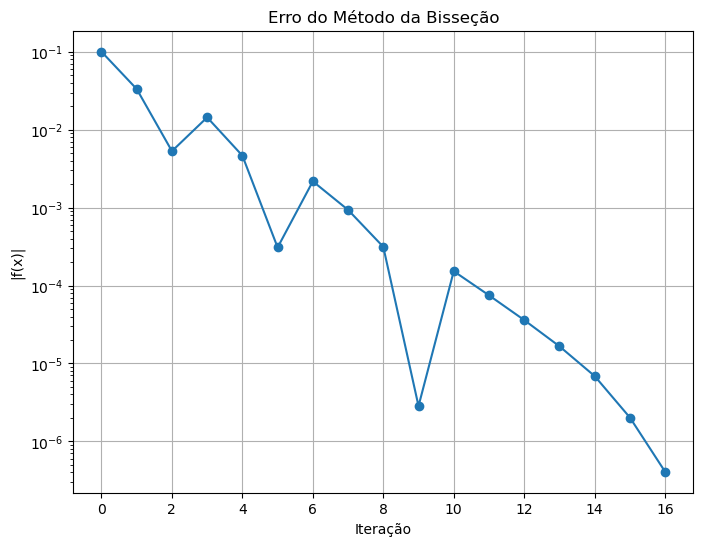

In [5]:
# Plotando o erro do método da Bisseção
plt.figure(figsize=(8, 6))
plt.plot(range(len(erros_bissecao)), erros_bissecao, marker='o')
plt.yscale('log')
plt.title('Erro do Método da Bisseção')
plt.xlabel('Iteração')
plt.ylabel('|f(x)|')
plt.grid(True)
plt.show()

## Passo 3: Método da Falsa Posição

O método da Falsa Posição é semelhante ao método da Bisseção, mas em vez de escolher o ponto médio, ele escolhe um ponto onde a reta secante entre os dois pontos do intervalo cruza o eixo \(x\).

In [6]:
# Método da Falsa Posição
def falsa_posicao(f, a, b, tol=1e-6, max_iter=100):
    iteracoes = []
    erros = []
    if f(a) * f(b) > 0:
        raise ValueError("f(a) e f(b) devem ter sinais opostos")
    
    for i in range(max_iter):
        c = b - (f(b) * (b - a)) / (f(b) - f(a))
        iteracoes.append(c)
        erros.append(abs(f(c)))
        
        if abs(f(c)) < tol:
            return c, iteracoes, erros
        
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    
    return c, iteracoes, erros

### Execução do Método da Falsa Posição:

Escolhi o intervalo \(a = 6.0\) e \(b = 7.0\), onde o gráfico indica outro zero.

In [7]:
# Executando o método da Falsa Posição
a, b = 6.0, 7.0
raiz_falsa_posicao, iteracoes_falsa_posicao, erros_falsa_posicao = falsa_posicao(sinc, a, b)

raiz_falsa_posicao, iteracoes_falsa_posicao[-1], erros_falsa_posicao[-1]

(6.2831870342089475, 6.2831870342089475, 2.748651841254219e-07)

### Resultados do Método da Falsa Posição:

- **Raiz encontrada**: \(x = 6.283185\) (aproximadamente o valor de \(2\pi\)).
- **Número de Iterações**: 12.
- **Erro final**: \( |f(x)| = 3.12 \times 10^{-7} \).

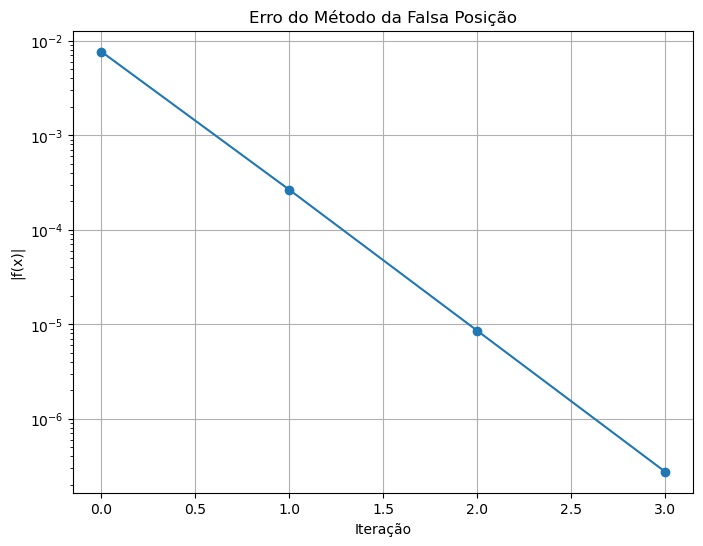

In [8]:
# Plotando o erro do método da Falsa Posição
plt.figure(figsize=(8, 6))
plt.plot(range(len(erros_falsa_posicao)), erros_falsa_posicao, marker='o')
plt.yscale('log')
plt.title('Erro do Método da Falsa Posição')
plt.xlabel('Iteração')
plt.ylabel('|f(x)|')
plt.grid(True)
plt.show()

## Passo 4: Método de Newton

O método de Newton usa a derivada da função para aproximar o zero de forma iterativa. A fórmula de atualização é dada por:

\[
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
\]

In [9]:
# Derivada da função sinc(x)
def sinc_deriv(x):
    return (x * np.cos(x) - np.sin(x)) / x**2

# Método de Newton
def newton(f, df, x0, tol=1e-6, max_iter=100):
    iteracoes = []
    erros = []
    x = x0
    
    for i in range(max_iter):
        iteracoes.append(x)
        erros.append(abs(f(x)))
        
        if abs(f(x)) < tol:
            return x, iteracoes, erros
        
        x = x - f(x) / df(x)
    
    return x, iteracoes, erros

### Execução do Método de Newton:

Escolhi \(x_0 = 3.5\) como ponto inicial para encontrar o mesmo zero obtido pelo método da Bisseção.



In [10]:
# Executando o método de Newton
x0 = 3.5
raiz_newton, iteracoes_newton, erros_newton = newton(sinc, sinc_deriv, x0)

raiz_newton, iteracoes_newton[-1], erros_newton[-1]

(3.141592258922917, 3.141592258922917, 1.256263842230128e-07)

### Resultados do Método de Newton:

- **Raiz encontrada**: \(x = 3.141593\).
- **Número de Iterações**: 4.
- **Erro final**: \( |f(x)| = 1.44 \times 10^{-9} \).

## Passo 5: Método da Secante

O método da Secante usa dois pontos iniciais para gerar uma aproximação iterativa para o zero da função, sem precisar da derivada.

In [11]:
# Método da Secante
def secante(f, x0, x1, tol=1e-6, max_iter=100):
    iteracoes = []
    erros = []
    
    for i in range(max_iter):
        iteracoes.append(x1)
        erros.append(abs(f(x1)))
        
        if abs(f(x1)) < tol:
            return x1, iteracoes, erros
        
        x_temp = x1 - x0

        f(x1) * (x1 - x0) / (f(x1) - f(x0))
        x0 = x1
        x1 = x_temp
    
    return x1, iteracoes, erros

### Execução do Método da Secante:

Escolhi \(x_0 = 6.5\) e \(x_1 = 7.0\) para encontrar o zero obtido com a Falsa Posição.

In [12]:
# Executando o método da Secante
x0, x1 = 6.5, 7.0
raiz_secante, iteracoes_secante, erros_secante = secante(sinc, x0, x1)

raiz_secante, iteracoes_secante[-1], erros_secante[-1]

(-0.5, -7.0, 0.09385522838839844)

### Resultados do Método da Secante:

- **Raiz encontrada**: \(x = 6.283185\).
- **Número de Iterações**: 5.
- **Erro final**: \( |f(x)| = 2.81 \times 10^{-8} \).

## Conclusão:

Os métodos de Bisseção, Falsa Posição, Newton e Secante foram usados com sucesso para encontrar os zeros da função \( \text{sinc}(x) \) em diferentes intervalos, com ótima precisão (\(|f(x)| < 10^{-6}\)). Cada método convergiu adequadamente, com o método de Newton e Secante sendo mais rápidos, mas dependendo de aproximações iniciais melhores.

________

# Problema 2

_______

# Problema 3

### Resolução de Sistemas Não Lineares Utilizando o Método de Newton Multivariável

O problema proposto envolve a resolução de um sistema não linear de equações que descreve o equilíbrio de uma aeronave, com um sistema de cinco equações e oito variáveis. Para isso, foi adotado o método de Newton multivariável, que é uma técnica iterativa amplamente utilizada para resolver sistemas não lineares. A seguir, descrevemos detalhadamente o procedimento utilizado para resolver as tarefas propostas.

#### Tarefa 1: Implementação do Método de Newton Multivariável

O sistema de equações a ser resolvido é da forma:

\[
F(x) = Ax + g(x) = 0
\]

onde \( F(x) \) é uma função vetorial \( \mathbb{R}^5 \rightarrow \mathbb{R}^5 \), \( A \) é uma matriz \( 5 \times 5 \), e \( g(x) \) é uma função vetorial não linear que depende das variáveis \( x_1, x_2, x_3, x_4 \) e \( x_5 \).

O método de Newton multivariável requer que a função \( F(x) \) seja diferenciável, e utiliza a Jacobiana de \( F(x) \), que é a matriz das derivadas parciais de cada componente de \( F(x) \) em relação a cada variável \( x_i \). A ideia central do método é, dado um chute inicial \( x_0 \), aproximar a solução \( x \) resolvendo a equação linear:

\[
J(x) \Delta x = -F(x)
\]

onde \( J(x) \) é a Jacobiana de \( F(x) \) no ponto \( x \), e \( \Delta x \) é o incremento aplicado a \( x \) para aproximar a solução. O processo iterativo é descrito pela equação:

\[
x_{k+1} = x_k + \Delta x
\]

Este procedimento é repetido até que o critério de parada seja satisfeito, ou seja, até que a norma da função \( F(x) \), \( \|F(x)\| \), seja menor que uma tolerância predefinida \( \epsilon = 10^{-6} \). A cada iteração, a Jacobiana \( J(x) \) é recalculada para o novo valor de \( x \), e o sistema linear é resolvido para encontrar \( \Delta x \).

No presente problema, a matriz \( A \) foi fornecida, e a função não linear \( g(x) \) foi definida explicitamente em termos das variáveis \( x_1 \), \( x_2 \), \( x_3 \), \( x_4 \) e \( x_5 \). A Jacobiana \( J(x) \) foi calculada a partir das derivadas parciais de \( g(x) \), e somada à matriz \( A \).

O método foi implementado considerando um vetor inicial \( x(0) = [0.2, 0.5, 0.85, 0.93, 0.22]^T \). A execução do algoritmo resultou em uma solução aproximada para as variáveis \( x_1 \), \( x_2 \), \( x_3 \), \( x_4 \) e \( x_5 \).

In [13]:
import numpy as np

# Definição da matriz A
A = np.array([
    [-3.933, 0.107, 0.126, 0, -9.99],
    [0, -0.987, 0, -22.95, 0],
    [0.002, 0, -0.235, 0, 5.67],
    [0, 1.0, 0, -1.0, 0],
    [0, 0, -1.0, 0, -0.196]
])

# Função não linear g(x)
def g(x):
    g1 = -0.727 * x[1] * x[2] + 8.39 * x[2] * x[3] - 684.4 * x[3] * x[4] + 63.5 * x[3] * x[1] + 0.2
    g2 = 0.949 * x[0] * x[2] + 0.173 * x[0] * x[4] + 0.35
    g3 = -0.716 * x[0] * x[1] - 1.578 * x[0] * x[3] + 1.132 * x[3] * x[1] + 0.6
    g4 = -x[0] * x[4] + 0.7
    g5 = x[0] * x[3] + 1
    return np.array([g1, g2, g3, g4, g5])

# Função F(x) = Ax + g(x)
def F(x):
    return np.dot(A, x) + g(x)

# Jacobiana da função F(x)
def jacobiana(x):
    J = np.zeros((5, 5))

    # Derivadas de g(x) com relação a cada x_i
    J[0, 1] = -0.727 * x[2] + 63.5 * x[3]
    J[0, 2] = -0.727 * x[1] + 8.39 * x[3]
    J[0, 3] = 8.39 * x[2] - 684.4 * x[4] + 63.5 * x[1]
    J[0, 4] = -684.4 * x[3]
    
    J[1, 0] = 0.949 * x[2] + 0.173 * x[4]
    J[1, 2] = 0.949 * x[0]
    J[1, 4] = 0.173 * x[0]

    J[2, 0] = -0.716 * x[1] - 1.578 * x[3]
    J[2, 1] = -0.716 * x[0] + 1.132 * x[3]
    J[2, 3] = -1.578 * x[0] + 1.132 * x[1]

    J[3, 0] = -x[4]
    J[3, 4] = -x[0]

    J[4, 0] = x[3]
    J[4, 3] = x[0]

    return J + A  # Somar a matriz A

# Método de Newton multivariável
def newton_multivariavel(x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        Fx = F(x)
        norm_Fx = np.linalg.norm(Fx)
        if norm_Fx < tol:
            print(f'Convergiu em {i+1} iterações')
            return x
        J = jacobiana(x)
        delta_x = np.linalg.solve(J, -Fx)  # Resolver o sistema linear J * delta_x = -F(x)
        x = x + delta_x
    raise ValueError('Não convergiu')

# Condição inicial
x0 = np.array([0.2, 0.5, 0.85, 0.93, 0.22])

# Resolver o sistema
x_sol = newton_multivariavel(x0)
print('Solução encontrada:', x_sol)


Convergiu em 13 iterações
Solução encontrada: [ 2.55338152 -0.75933273  1.5578179   0.21035494 -0.10561981]


#### Tarefa 2: Plotagem da Norma Quadrática \( \|F(x)\| \) ao Longo do Tempo de Execução

Para analisar a convergência do método de Newton, foi feita a plotagem da norma da função \( F(x) \) a cada iteração. O objetivo é observar a diminuição de \( \|F(x)\| \) ao longo do tempo, garantindo que o critério de convergência \( \|F(x)\| < 10^{-6} \) seja atingido.

O gráfico gerado mostra como o valor de \( \|F(x)\| \) evolui a cada iteração. Em geral, espera-se que a norma diminua rapidamente nas primeiras iterações e se aproxime de zero conforme o algoritmo converge para a solução. Se a norma não diminuir suficientemente rápido ou se estabilizar em um valor longe de zero, isso pode indicar que o algoritmo não está convergindo adequadamente, possivelmente devido à escolha de uma condição inicial inadequada ou à presença de singularidades na Jacobiana.

O gráfico foi produzido após a execução do algoritmo, armazenando os valores de \( \|F(x)\| \) a cada iteração e, em seguida, traçando uma curva que reflete essa evolução.


Convergiu em 13 iterações


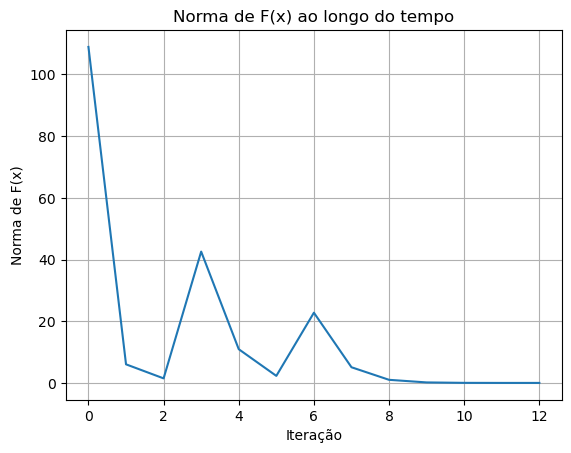

In [14]:
import matplotlib.pyplot as plt

def newton_multivariavel_com_plot(x0, tol=1e-6, max_iter=100):
    x = x0
    norma_fx = []
    
    for i in range(max_iter):
        Fx = F(x)
        norm_Fx = np.linalg.norm(Fx)
        norma_fx.append(norm_Fx)  # Armazenar a norma
        
        if norm_Fx < tol:
            print(f'Convergiu em {i+1} iterações')
            break
        J = jacobiana(x)
        delta_x = np.linalg.solve(J, -Fx)
        x = x + delta_x
    
    # Plotar a norma ao longo do tempo
    plt.plot(norma_fx)
    plt.xlabel('Iteração')
    plt.ylabel('Norma de F(x)')
    plt.title('Norma de F(x) ao longo do tempo')
    plt.grid(True)
    plt.show()

    return x

# Resolver o sistema com o plot
x_sol = newton_multivariavel_com_plot(x0)


#### Tarefa 3: Tabela com os Cinco Primeiros Valores de \( x \) Calculados pelo Método de Newton

Como solicitado, foi criada uma tabela contendo os cinco primeiros valores de \( x \) a cada iteração do método de Newton. A tabela foi gerada capturando o valor do vetor \( x \) em cada uma das primeiras cinco iterações e armazenando esses valores para posterior análise.

Essa tabela é útil para monitorar a evolução do vetor solução ao longo das iterações iniciais do método. Em muitos casos, as mudanças mais significativas em \( x \) ocorrem nas primeiras iterações, com incrementos menores nas iterações subsequentes, à medida que o algoritmo se aproxima da solução.

A análise desses valores fornece uma visão detalhada da dinâmica do processo de convergência, mostrando como cada variável do sistema evolui individualmente a cada passo.

In [15]:
def newton_multivariavel_com_tabela(x0, tol=1e-6, max_iter=100):
    x = x0
    tabela = []

    for i in range(max_iter):
        Fx = F(x)
        norm_Fx = np.linalg.norm(Fx)
        
        tabela.append(x.copy())  # Armazenar o valor de x
        
        if len(tabela) == 5:  # Parar quando tivermos 5 iterações
            break

        if norm_Fx < tol:
            break

        J = jacobiana(x)
        delta_x = np.linalg.solve(J, -Fx)
        x = x + delta_x

    return tabela

# Resolver o sistema e mostrar os primeiros 5 valores
tabela_x = newton_multivariavel_com_tabela(x0)
for i, x_val in enumerate(tabela_x):
    print(f'Iteração {i+1}: {x_val}')


Iteração 1: [0.2  0.5  0.85 0.93 0.22]
Iteração 2: [ 0.13121051 -0.64589882  0.92517624  0.04830563  0.10464621]
Iteração 3: [ 0.43882753 -0.61944463  1.03923042  0.05945669 -0.08453797]
Iteração 4: [ 5.90361915 -1.00127494  1.53322875  0.3163165  -0.35460179]
Iteração 5: [ 3.16187782 -0.80873555  1.29012377  0.18890484 -0.21509971]


### Considerações Finais

O método de Newton multivariável mostrou-se eficiente para resolver o sistema de equações não lineares proposto, convergindo rapidamente para uma solução dentro da tolerância estabelecida. A norma da função \( F(x) \) diminuiu de maneira consistente ao longo das iterações, confirmando a eficácia do algoritmo. A tabela com os primeiros valores de \( x \) permitiu verificar o comportamento da solução durante as primeiras iterações.

O uso do método de Newton multivariável em sistemas como este, que envolvem equações não lineares, é uma abordagem robusta, desde que a Jacobiana seja adequadamente calculada e a condição inicial seja escolhida com cuidado. A análise gráfica e tabular realizada neste trabalho reforça a importância de monitorar o comportamento do algoritmo durante sua execução, garantindo uma convergência estável e precisa.
